In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/Raghavagr/Laptop_Price_Prediction/main/laptop_data.csv"
df = pd.read_csv(url)

print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (1303, 12)


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [2]:
# Droping unnecessary index column
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
    
# removing GB from RAM column
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Ram'] = df['Ram'].astype('int32')

# removing KG from weight column
df['Weight'] = df['Weight'].str.replace('kg', '')
df['Weight'] = df['Weight'].astype('float32')

# verifying
print("--- Data Types After Cleaning ---")
print(df.dtypes[['Ram', 'Weight']])

print("\n--- Cleaned Data Preview ---")
display(df.head())

--- Data Types After Cleaning ---
Ram         int32
Weight    float32
dtype: object

--- Cleaned Data Preview ---


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [4]:
# checking for nulls
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [11]:
# creating touchscreen column
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [13]:
# for extracting resolution
new = df['ScreenResolution'].str.split('x', n=1, expand=True)

df['X_res'] = new[0].str.extract(r'(\d+)$').astype('int')
df['Y_res'] = new[1].astype('int')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600


In [15]:
# Check correlation with Price
# Note: This only works for numerical columns
print(df.corr(numeric_only=True)['Price'].sort_values(ascending=False))
df.head()

Price          1.000000
Ram            0.743007
X_res          0.556529
Y_res          0.552809
Weight         0.210370
Touchscreen    0.191226
Inches         0.068197
Name: Price, dtype: float64


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600


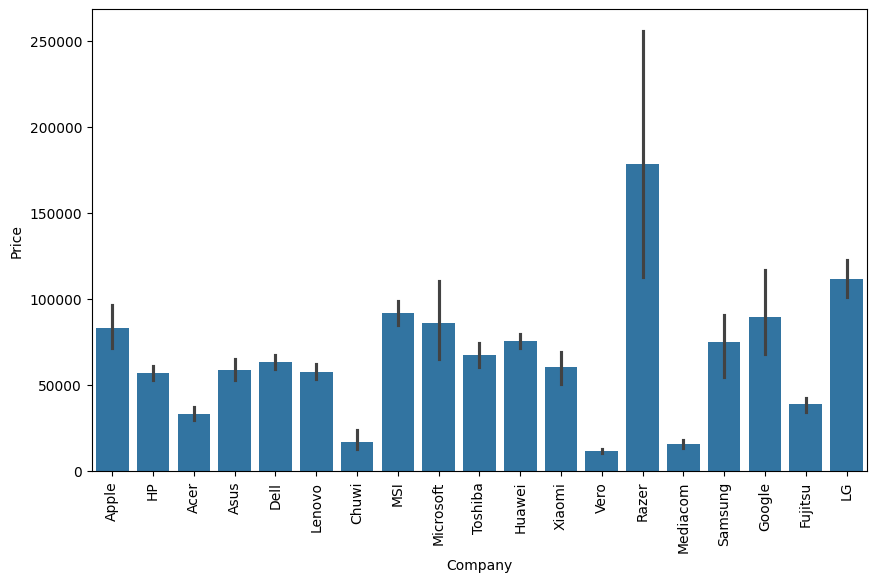

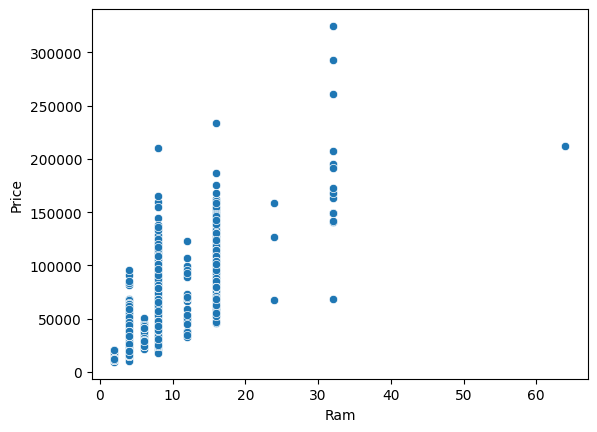

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Which brand is the most expensive?
plt.figure(figsize=(10,6))
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

# Does RAM increase price linearly?
sns.scatterplot(x=df['Ram'], y=df['Price'])
plt.show()

In [20]:
def fetch_cpu(text):
    words = text.split()
    # Checking for Intel Core models
    if words[0] == 'Intel' and words[1] == 'Core':
        return ' '.join(words[0:3]) # Returns 'Intel Core i5' etc.
    # Checking for other Intel (Pentium, Celeron)
    elif words[0] == 'Intel':
        return 'Other Intel Processor'
    # Checking for AMD
    else:
        return 'AMD Processor'

# Applying the function to create a new 'Cpu brand' column
df['Cpu brand'] = df['Cpu'].apply(fetch_cpu)

print(df['Cpu brand'].value_counts())

Cpu brand
Intel Core i7            527
Intel Core i5            423
Intel Core i3            136
Other Intel Processor    135
AMD Processor             63
Intel Core M              19
Name: count, dtype: int64


In [21]:
df.drop(columns=['Cpu'], inplace=True)

In [22]:
# Selecting categorical columns 
categorical_cols = ['Company', 'TypeName', 'OpSys', 'Cpu brand', 'Gpu']
# One-Hot Encoding using Pandas
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(f"New shape after encoding: {df_encoded.shape}")

New shape after encoding: (1303, 154)


In [23]:
from sklearn.preprocessing import StandardScaler

#Identifying numerical columns (excluding Price)
num_cols = ['Ram', 'Weight', 'X_res', 'Y_res']
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

print("Scaling complete!")
display(df_encoded.head())

Scaling complete!


,Inches,ScreenResolution,Ram,Memory,Weight,Price,Touchscreen,X_res,Y_res,Company_Apple,...,Gpu_Nvidia Quadro M1000M,Gpu_Nvidia Quadro M1200,Gpu_Nvidia Quadro M2000M,Gpu_Nvidia Quadro M2200,Gpu_Nvidia Quadro M2200M,Gpu_Nvidia Quadro M3000M,Gpu_Nvidia Quadro M500M,Gpu_Nvidia Quadro M520M,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M
0,13.3,IPS Panel Retina Display 2560x1600,-0.075195,128GB SSD,-1.005283,71378.6832,0,1.345362,1.860586,True,...,False,False,False,False,False,False,False,False,False,False
1,13.3,1440x900,-0.075195,128GB Flash Storage,-1.050381,47895.5232,0,-0.919776,-0.600648,True,...,False,False,False,False,False,False,False,False,False,False
2,15.6,Full HD 1920x1080,-0.075195,256GB SSD,-0.268684,30636.0000,0,0.050997,0.032241,False,...,False,False,False,False,False,False,False,False,False,False
3,15.4,IPS Panel Retina Display 2880x1800,1.498767,512GB SSD,-0.313782,135195.3360,0,1.992544,2.563795,True,...,False,False,False,False,False,False,False,False,False,False
4,13.3,IPS Panel Retina Display 2560x1600,-0.075195,256GB SSD,-1.005283,96095.8080,0,1.345362,1.860586,True,...,False,False,False,False,False,False,False,False,False,False


In [24]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Columns: 154 entries, Inches to Gpu_Nvidia Quadro M620M
dtypes: bool(145), float64(6), int64(1), object(2)
memory usage: 276.3+ KB


In [25]:
cols_to_drop = df_encoded.select_dtypes(include=['object']).columns
df_encoded.drop(columns=cols_to_drop, inplace=True)

print("Remaining types:")
print(df_encoded.dtypes.unique())

Remaining types:
[dtype('float64') dtype('int64') dtype('bool')]


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 12434.66
RMSE: 18152.64


In [28]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"--- Random Forest Results ---")
print(f"New MAE: {mae_rf:.2f}")
print(f"New RMSE: {rmse_rf:.2f}")
print(f"\nImprovement in MAE: {12434.66 - mae_rf:.2f}")


--- Random Forest Results ---
New MAE: 10670.99
New RMSE: 17658.37

Improvement in MAE: 1763.67


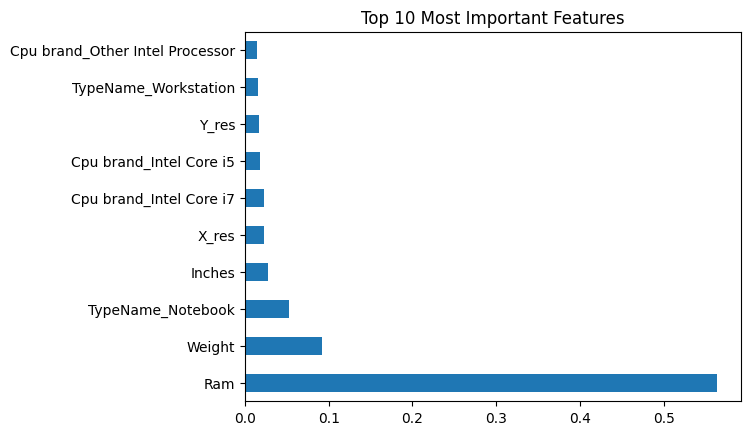

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Getting feature importance from the model
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Most Important Features')
plt.show()

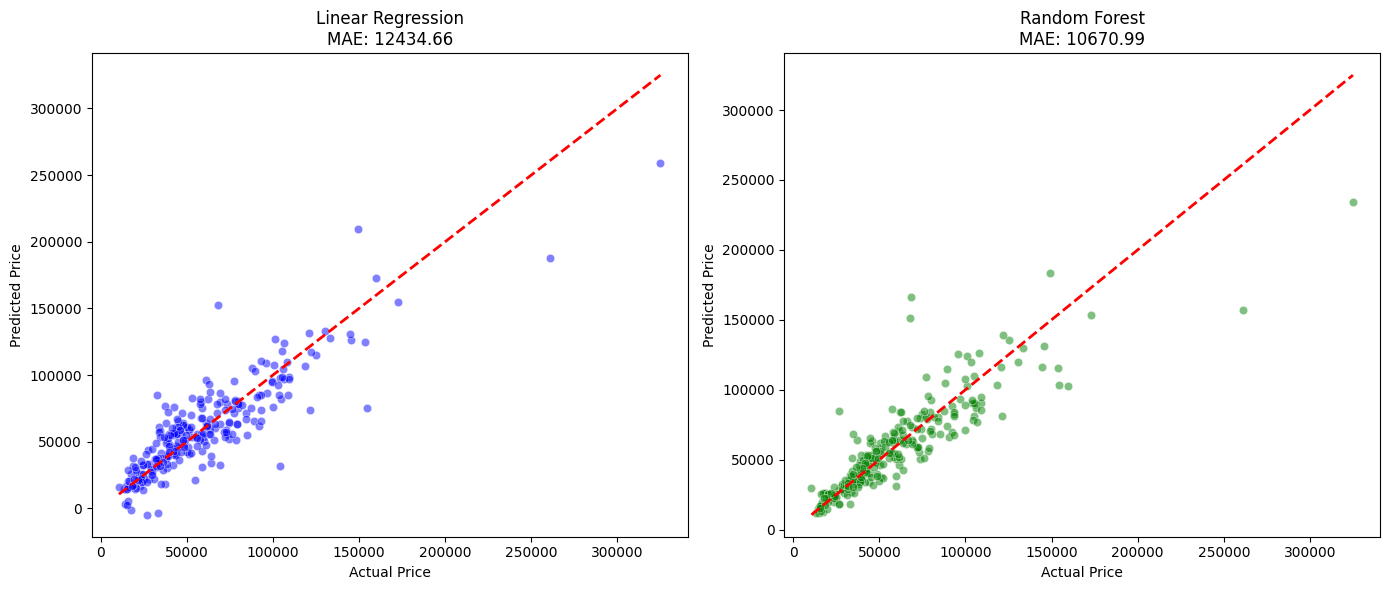

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# for Linear Regression
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Linear Regression\nMAE: 12434.66')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# for Random Forest
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) 
plt.title(f'Random Forest\nMAE: 10670.99')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.tight_layout()
plt.show()